# Laptop Price Prediction

In this project I will prepare a prediction modelling for Laptop Prices based on their specifications. This dataset is taken from Kaggle. 

### Table of Contents:


1. Data Collection and Preparation
2. Exploratory Data Analysis
3. Feature Engineering
4. Model Selection and Training
5. Model Evaluation and Tuning
6. Final Model and Deployment

<img src='https://i.rtings.com/assets/pages/ZRskDBBI/best-laptop-brands-20230420-3-medium.jpg?format=auto' style='display: block; margin-left: auto; margin-right: auto;'>

<a href='https://www.kaggle.com/code/keerthivasankannan/price-prediction-on-laptops-using-machine-learning/notebook' target= _blank> Can get data from this link

### Data Collection and Preparation

In [175]:
#Imports of required packages

import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np
import datetime

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [201]:
df = pd.read_csv("laptop_data.csv")

### Exploratory Data Analysis

In [177]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [178]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [179]:
df.shape

(1303, 12)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [181]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [182]:
df.corr(numeric_only=True)

,Unnamed: 0,Inches,Price
Unnamed: 0,1.000000,-0.087936,0.067984
Inches,-0.087936,1.000000,0.068197
Price,0.067984,0.068197,1.000000


In [183]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

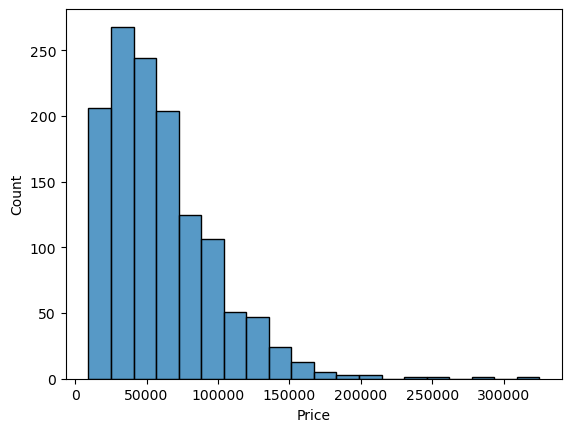

In [184]:
sns.histplot(x = df["Price"], bins = 20);

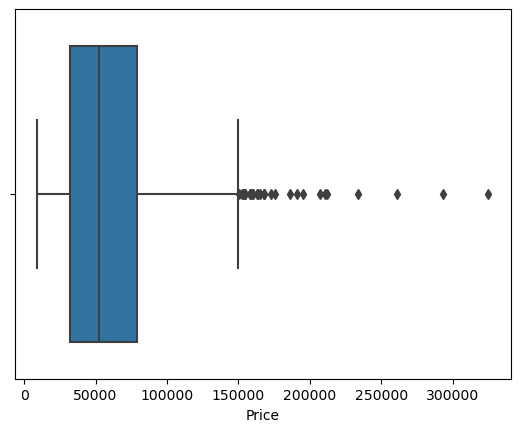

In [185]:
sns.boxplot(x = df["Price"]);

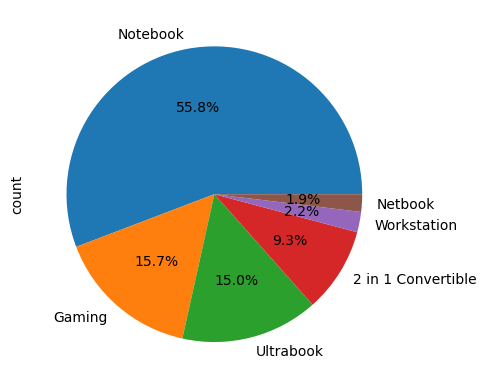

In [186]:
df['TypeName'].value_counts().plot.pie(autopct = '%1.1f%%');

<Figure size 1200x600 with 0 Axes>

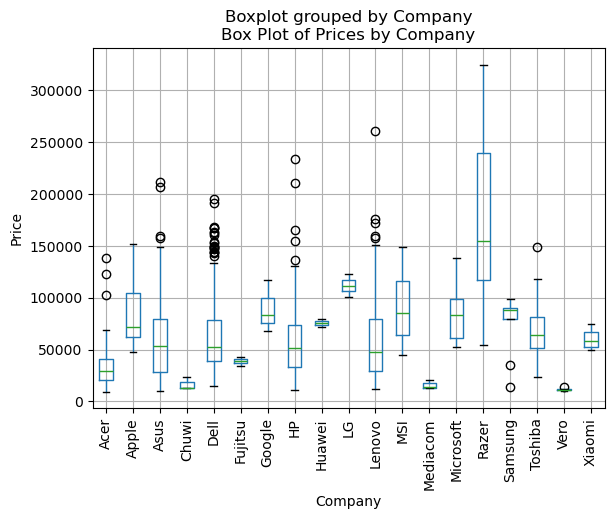

In [187]:
plt.figure(figsize=(12, 6))
df.boxplot(column='Price', by='Company')
plt.title('Box Plot of Prices by Company')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x600 with 0 Axes>

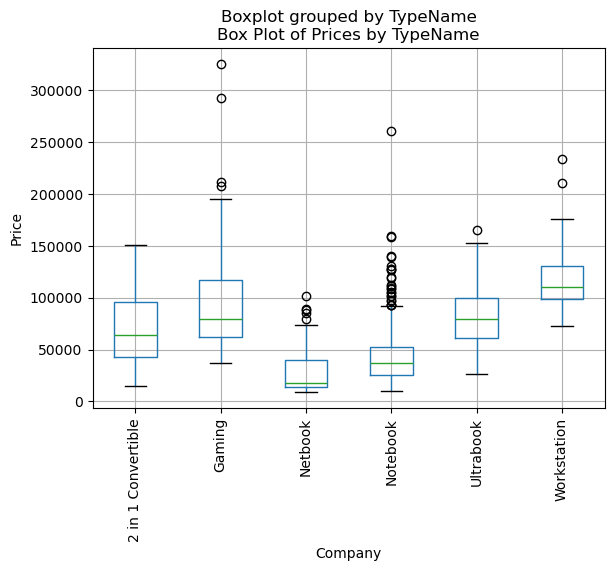

In [188]:
plt.figure(figsize=(12, 6))
df.boxplot(column='Price', by='TypeName')
plt.title('Box Plot of Prices by TypeName')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x600 with 0 Axes>

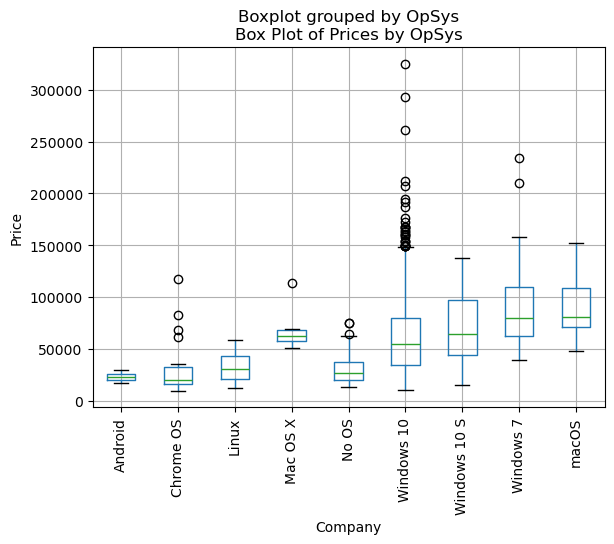

In [189]:
plt.figure(figsize=(12, 6))
df.boxplot(column='Price', by='OpSys')
plt.title('Box Plot of Prices by OpSys')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

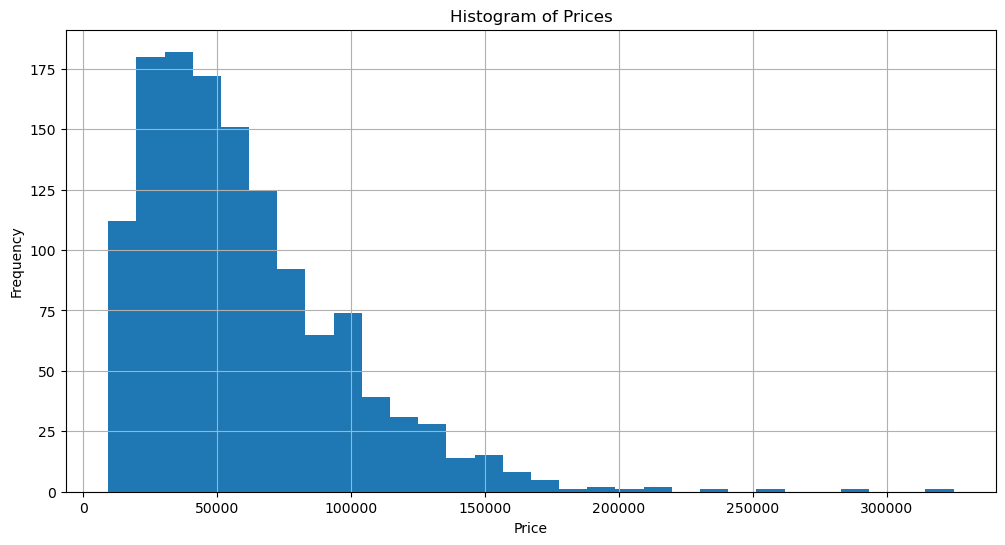

In [190]:
plt.figure(figsize=(12, 6))
df['Price'].hist(bins=30)
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [191]:
px.bar(df, x = 'Company', y = 'Price', color = 'TypeName')

In [192]:
fig = px.sunburst(df, path= ['Company', 'TypeName', 'OpSys'], values = 'Price');
fig.show()

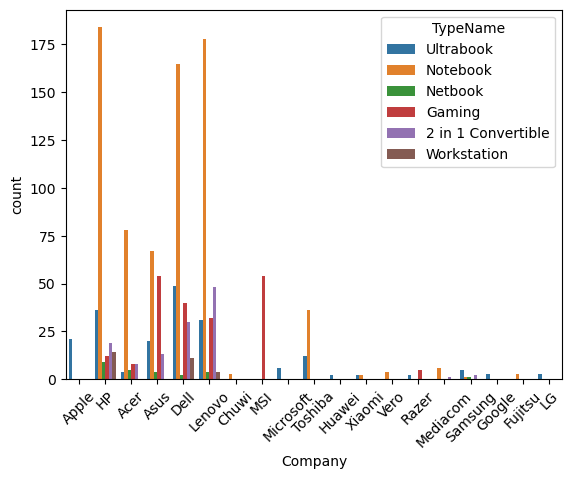

In [193]:
sns.countplot(x= df['Company'], hue = df.TypeName);
plt.xticks(rotation = 45);

### Feature Engineering

In [194]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [203]:
#Drop useless columns
df = df.drop("Unnamed: 0", axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [204]:
#Drop doubled rows
df.duplicated() # if exists any True check sums of them  
df.duplicated().sum() # drop duplicates
df.drop_duplicates()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200


In [205]:
#Check for null values

df.isnull().sum() #if exists any null fill them with mean for integer cariables and median for categorical variables
#df.dropna()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [293]:
df.head()
df["Company"].unique() #create dummies
df["TypeName"].unique() #create dummies
df["Inches"].unique() #ready to correlation
df["ScreenResolution"].unique() #create new columns by this column's value
df["Cpu"].unique() #create new columns by this column's value for 'CPU_brand', 'CPU_model', 'CPU_speed'
df["Ram"].unique() #drop gb and make integer
df["Memory"].unique() #create new columns by this column's value for 'RAM_capacity', 'RAM_type'
df["Gpu"].unique() #create new columns by this column's value for 'GPU_brand', 'GPU_type'
df["OpSys"].unique() #make label encoding and create dummies
df["Weight"].unique() #drop kg and make integer

df["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [294]:
#sıfırlama kodu
df = pd.read_csv("laptop_data.csv")
df = df.drop("Unnamed: 0", axis=1)
df.duplicated() # if exists any True check sums of them  
df.duplicated().sum() # drop duplicates
df.drop_duplicates()
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
801,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.37kg,58554.72
191,Vero,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.3kg,13852.80
1064,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.8kg,102777.12
485,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.75kg,55890.72
395,HP,Ultrabook,15.6,Full HD 1920x1080,AMD A9-Series 9420 3GHz,4GB,256GB SSD,AMD Radeon 520,Windows 10,1.91kg,26586.72


In [295]:
#bunlar tamam
df[['Width', 'Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(int)
df['PanelType'] = df['ScreenResolution'].apply(lambda x: 'IPS' if 'IPS' in x else ('TN' if 'TN' in x else ('VA' if 'VA' in x else 'Unknown')))
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: '1' if 'touchscreen' in x.lower() else '0')
df['HD'] = df['ScreenResolution'].apply(lambda x: '1' if 'hd' in x.lower() else '0')
df['AspectRatio'] = df['Width'] / df['Height']
df['TotalPixels'] = df['Width'] * df['Height']

# CPU parçalarının ayrıştırılması
cpu_parts = df['Cpu'].str.split(' ', expand=True)

# Maksimum parça sayısını yeniden hesapla
max_parts = cpu_parts.shape[1]

# Her parça için yeni sütunlar oluştur
for i in range(max_parts):
    df[f'CPU_part_{i+1}'] = cpu_parts.iloc[:, i]

# CPU hızını doğru bir şekilde çıkar
df['CPU_speed'] = cpu_parts.iloc[:, -1].str.extract('(\d+\.\d+)', expand=False).astype(float)

# Eğer son parça boşsa, bir önceki parçadan al
df['CPU_speed'] = df['CPU_speed'].fillna(cpu_parts.iloc[:, -2].str.extract('(\d+\.\d+)', expand=False).astype(float))

# Eğer bir önceki parça da boşsa, daha önceki parçadan al
df['CPU_speed'] = df['CPU_speed'].fillna(cpu_parts.iloc[:, -3].str.extract('(\d+\.\d+)', expand=False).astype(float))
#gereksiz kolonları dropla
df = df.drop(['CPU_part_3', 'CPU_part_4', 'CPU_part_5', 'CPU_part_6'], axis=1)

df['RAM_new'] = df['Ram'].str.replace('GB', '').astype(int)



In [296]:

#burdan devam 

# Unique değerleri df["Memory"].unique() den oku
unique_values = df["Memory"].unique()

# Depolama türü ve kapasitesini ayıklama
storage_types = []
storage_capacities = []

for value in unique_values:
    value_parts = value.split('+')
    
    for part in value_parts:
        part = part.strip()
        storage_type = None
        storage_capacity = None
        
        # Depolama türünü ayıklama
        if 'SSD' in part:
            storage_type = 'SSD'
        elif 'Flash' in part:
            storage_type = 'Flash Storage'
        elif 'HDD' in part:
            storage_type = 'HDD'
        elif 'Hybrid' in part:
            storage_type = 'Hybrid'
        
        # Depolama kapasitesini ayıklama
        for item in part.split():
            if item.endswith('GB') or item.endswith('TB'):
                storage_capacity = item
                break
        
        storage_types.append(storage_type)
        storage_capacities.append(storage_capacity)

# Yeni sütunları DataFrame'e ekle
df['depolama_türü'] = storage_types
df['depolama_kapasitesi'] = storage_capacities




ValueError: Length of values (54) does not match length of index (1303)

In [289]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Width,Height,PanelType,Touchscreen,HD,AspectRatio,TotalPixels,CPU_part_1,CPU_part_2,CPU_speed,RAM_new
81,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core i5 1.3GHz,8GB,512GB SSD,Intel HD Graphics 615,macOS,0.92kg,80452.8000,2304,1440,IPS,0,0,1.600000,3317760,Intel,Core,1.3,8
1293,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200,1920,1080,IPS,0,1,1.777778,2073600,Intel,Core,2.6,8
80,Dell,Ultrabook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.88kg,58403.4048,1920,1080,IPS,0,1,1.777778,2073600,Intel,Core,1.6,8
724,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.7kg,71847.0144,1920,1080,Unknown,0,1,1.777778,2073600,Intel,Core,2.8,8
1024,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.09kg,55754.3232,1920,1080,Unknown,0,1,1.777778,2073600,Intel,Core,2.4,8


In [ ]:

df[['Width', 'Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(int)
df['PanelType'] = df['ScreenResolution'].apply(lambda x: 'IPS' if 'IPS' in x else ('TN' if 'TN' in x else ('VA' if 'VA' in x else 'Unknown')))
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: '1' if 'touchscreen' in x.lower() else '0')
df['HD'] = df['ScreenResolution'].apply(lambda x: '1' if 'hd' in x.lower() else '0')
df['AspectRatio'] = df['Width'] / df['Height']
df['TotalPixels'] = df['Width'] * df['Height']

# CPU parçalarının ayrıştırılması
cpu_parts = df['Cpu'].str.split(' ', expand=True)

# Maksimum parça sayısını yeniden hesapla
max_parts = cpu_parts.shape[1]

# Her parça için yeni sütunlar oluştur
for i in range(max_parts):
    df[f'CPU_part_{i+1}'] = cpu_parts.iloc[:, i]

# CPU hızını doğru bir şekilde çıkar
df['CPU_speed'] = cpu_parts.iloc[:, -1].str.extract('(\d+\.\d+)', expand=False).astype(float)

# Eğer son parça boşsa, bir önceki parçadan al
df['CPU_speed'] = df['CPU_speed'].fillna(cpu_parts.iloc[:, -2].str.extract('(\d+\.\d+)', expand=False).astype(float))

# Eğer bir önceki parça da boşsa, daha önceki parçadan al
df['CPU_speed'] = df['CPU_speed'].fillna(cpu_parts.iloc[:, -3].str.extract('(\d+\.\d+)', expand=False).astype(float))
#gereksiz kolonları dropla
df = df.drop(['CPU_part_3', 'CPU_part_4', 'CPU_part_5', 'CPU_part_6'], axis=1)


df['RAM_new'] = df['RAM'].str.replace('GB', '').astype(int)
df[['RAM_capacity', 'RAM_type']] = df['Memory'].str.split(' ', 1, expand=True)
df['RAM_capacity'] = df['RAM_type'].astype(int)
df['RAM_type'] = df['RAM_type'].str.replace('GB', '').str.strip()

df[['GPU_brand', 'GPU_type']] = df['Gpu'].str.split(' ', 1, expand=True)
df['GPU_type'] = 'Ayrı'
df.loc[df['GPU_brand'] == 'Intel', 'GPU_type'] = 'Integrated'

df['Weight_new'] = df['Weight'].str.replace('kg', '').astype(float)
